In [26]:
import pandas as pd
import geopandas as gpd

import numpy as np
import json
import requests

import fiona

import contextily as ctx
import matplotlib.pyplot as plt

# Importing the data for the USA Map coverage

In [2]:
lines = pd.ExcelFile('../data/lines.xlsx')

## Dividing the data into its separate program titles

In [3]:
df1 = pd.read_excel(lines, 'Professional Development')
df2 = pd.read_excel(lines, 'Artists in the Schools')
df3 = pd.read_excel(lines, 'Performances')
df4 = pd.read_excel(lines, 'Beyond the Classroom')
df5 = pd.read_excel(lines, 'Community Connections')
df6 = pd.read_excel(lines, 'Countries')

In [4]:
pro_dev = []
artists = []
perf = []
beyond = []
community = []

In [5]:
pro_dev.extend(df1.State.to_list())
artists.extend(df2.State.to_list())
perf.extend(df3.State.to_list())
beyond.extend(df4.State.to_list())
community.extend(df5.State.to_list())

In [7]:
def single_states(a, b, c, d, e):
    a = []
    a = a.extend(np.unique(pro_dev))
    b = []
    b = b.extend(np.unique(artists))
    c = []
    c = c.extend(np.unique(perf))
    d = d.extend(np.unique(beyond))
    e = e.extend(np.unique(community))

In [8]:
single_states(pro_dev, artists, perf, beyond, community)

## Retrieving a USA state map and finding the states that occur within the dataset vs the ones that do not

In [9]:
states = gpd.read_file('../data/usa-states-census-2014.shp', encoding='utf-8')

In [10]:
new_list = []
new_list.extend(np.unique(perf))

In [11]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [12]:
usa = world.loc[world['name'] == 'United States of America']

In [13]:
multiple_states = states[states['NAME'].isin(new_list)]
california = states[states['NAME'] == 'California']
california_2 = states[states['NAME'] == 'California']
north_c = states[states['NAME'] == 'North Carolina']
new_york = states[states['NAME'] == 'New York']
washington = states[states['NAME'] == 'Washington']
multiple_states.reset_index(inplace=True, drop=True)

In [14]:
usa_states = [multiple_states, usa]
usa_map = pd.concat(usa_states)
usa_map.reset_index(drop=True)

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry,pop_est,continent,name,iso_a3,gdp_md_est
0,06,01779778,0400000US06,06,CA,California,00,4.034838e+11,2.048327e+10,West,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,...",NaN,NaN,NaN,NaN,NaN
1,12,00294478,0400000US12,12,FL,Florida,00,1.389032e+11,3.140788e+10,Southeast,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ...",NaN,NaN,NaN,NaN,NaN
2,16,01779783,0400000US16,16,ID,Idaho,00,2.140454e+11,2.397728e+09,West,"POLYGON Z ((-117.24303 44.39097 0.00000, -117....",NaN,NaN,NaN,NaN,NaN
3,17,01779784,0400000US17,17,IL,Illinois,00,1.437947e+11,6.200927e+09,Midwest,"POLYGON Z ((-91.50617 40.20064 0.00000, -91.49...",NaN,NaN,NaN,NaN,NaN
4,19,01779785,0400000US19,19,IA,Iowa,00,1.446686e+11,1.076857e+09,Midwest,"POLYGON Z ((-96.62187 42.77925 0.00000, -96.57...",NaN,NaN,NaN,NaN,NaN
5,21,01779786,0400000US21,21,KY,Kentucky,00,1.022624e+11,2.393339e+09,Southeast,"POLYGON Z ((-89.54443 36.57451 0.00000, -89.47...",NaN,NaN,NaN,NaN,NaN
6,24,01714934,0400000US24,24,MD,Maryland,00,2.514758e+10,6.983455e+09,Northeast,"MULTIPOLYGON Z (((-76.04621 38.02553 0.00000, ...",NaN,NaN,NaN,NaN,NaN
7,27,00662849,0400000US27,27,MN,Minnesota,00,2.062366e+11,1.892432e+10,Midwest,"POLYGON Z ((-97.22904 49.00069 0.00000, -96.93...",NaN,NaN,NaN,NaN,NaN
8,29,01779791,0400000US29,29,MO,Missouri,00,1.780400e+11,2.500220e+09,Midwest,"POLYGON Z ((-95.76564 40.58521 0.00000, -95.53...",NaN,NaN,NaN,NaN,NaN
9,36,01779796,0400000US36,36,NY,New York,00,1.220546e+11,1.924205e+10,Northeast,"MULTIPOLYGON Z (((-72.01893 41.27411 0.00000, ...",NaN,NaN,NaN,NaN,NaN


## Retrieving a custom layer, made by myself, in Mapbox Studio

In [15]:
tile_1 = 'https://api.mapbox.com/styles/v1/jimmywhite87/cl5db8jc7000415s1e3wk7uft/tiles/256/{z}/{x}/{y}@2x?access_token=pk.eyJ1IjoiamltbXl3aGl0ZTg3IiwiYSI6ImNsNHV0cmI0YTFvamMza2xwMGpucHc3ODgifQ.Y86Fp2t5Xo02YBfXqJliKA'

attribution = '© <a href="https://www.mapbox.com/about/maps/">Mapbox</a> © <a href="http://www.openstreetmap.org/copyright">OpenStreetMap</a> <strong><a href="https://www.mapbox.com/map-feedback/" target="_blank">Improve this map</a></strong>'

## Making sure all the state geographical geometry are all in the same format

In [16]:
states = states.to_crs(epsg=3857)

In [17]:
df_wm = multiple_states.to_crs(epsg=3857)
import rasterio
from rasterio.crs import CRS as CRS

In [18]:
df_wm.reset_index(inplace=True, drop=True)

In [19]:
df_usa = usa.to_crs(epsg=3857)

In [20]:
def plot_states(list):
    for x in list:
        new = states[states['NAME'] == x]
        new.plot(ax=ax, edgecolor=col_hex[1], alpha=0.1)

In [21]:
df_wm.to_csv('df_wm.csv', index=True, header=True)

In [22]:
df_wm = df_wm.drop(0)
df_wm = df_wm.reset_index(drop=True)

In [23]:
multiple_states = multiple_states.drop(0)
multiple_states = multiple_states.reset_index(drop=True)

## Plotting a geographical reference image which will then be turned into an Adobe Illustrator file for the final product

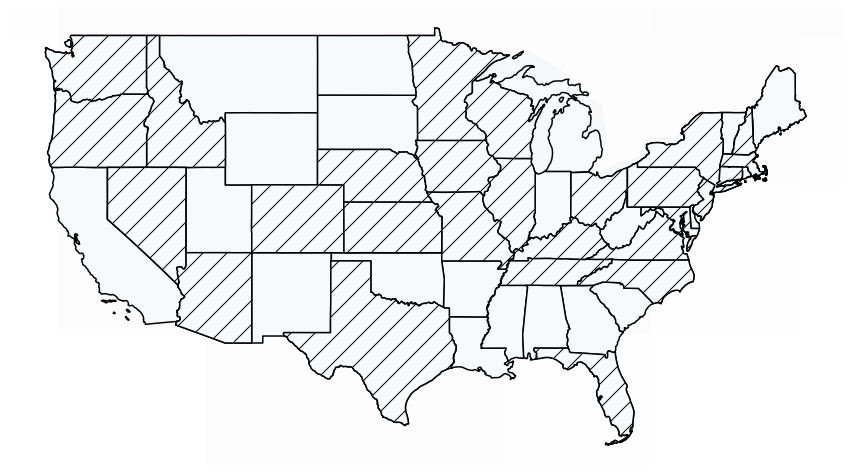

In [27]:
ax = states.plot(figsize=(15, 15), color='white', edgecolor='black', alpha=1, linewidth=1.5)

for x in range(len(multiple_states)):
    df_wm.loc[[x]].plot(ax=ax, color='#FFFFFF', alpha=1, edgecolor='black', linewidth=1.5, hatch='/')

ctx.add_basemap(ax, crs='EPSG:3857', source=tile_1)

df_usa.plot(ax=ax, edgecolor="black", alpha=0.03)

ax.axis('off')

plt.show()

In [25]:
ax.figure.savefig('new_usa.jpg', dpi=300)